In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib



In [21]:
chunksize = 100000
def load_data_in_chunks(file_path, chunksize):
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        yield chunk

def process_chunk_rf(X_train, y_train, chunk):
    X_chunk = chunk.drop('labels', axis=1)
    y_chunk = chunk['labels']
    X_train = pd.concat([X_train, X_chunk])
    y_train = pd.concat([y_train, y_chunk])
    return X_train, y_train

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [22]:
X_train = pd.DataFrame()
y_train = pd.Series(dtype=int)

In [23]:
label_counts = {i: 0 for i in range(9)}

In [24]:
for chunk in load_data_in_chunks("/combined_dataset.csv", chunksize=chunksize):
    X_train, y_train = process_chunk_rf(X_train, y_train, chunk)
    counts = chunk['labels'].value_counts()
    for label, count in counts.items():
        label_counts[label] += count

In [25]:
label_counts_df = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Count'])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
accuracy, report = evaluate_model(rf_model, X_test, y_test)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9801301505585875
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    481151
         1.0       0.95      0.99      0.97     34437
         2.0       0.94      0.99      0.97     27598
         3.0       0.91      0.91      0.91     12840
         4.0       0.49      0.47      0.48      1950
         5.0       0.99      1.00      0.99     43509
         6.0       0.63      0.43      0.51      2808
         7.0       0.82      0.68      0.74       198
         8.0       0.85      0.79      0.82      3113

    accuracy                           0.98    607604
   macro avg       0.84      0.80      0.82    607604
weighted avg       0.98      0.98      0.98    607604



In [20]:
y_pred = rf_model.predict(X_test)

In [21]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print(conf_matrix_df)

        0      1      2     3    4      5    6   7     8
0  265665    935    844   632  573    266  369  24   236
1     100  19307      0     0    0      0    0   0     0
2     127      0  15314     0    0      0    0   0     0
3     703      0      0  6468    0      0    0   0     0
4     598      0      0     0  511      0    0   0     0
5      24      0      0     0    0  24204    0   0     0
6     837      0      0     0    0      0  689   0     0
7      35      0      0     0    0      0    0  63     0
8     350      0      0     0    0      0    0   0  1384


In [22]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                          Feature  Importance
76   0.000000000000000000e+00.33    0.063744
77   1.000000000000000000e+00.19    0.050466
27    1.000000000000000000e+00.9    0.048995
79   0.000000000000000000e+00.34    0.044952
58   1.000000000000000000e+00.14    0.043376
..                           ...         ...
228  1.450000000000000000e+03.23    0.000008
226  1.450000000000000000e+03.21    0.000008
225  1.450000000000000000e+03.20    0.000007
227  1.450000000000000000e+03.22    0.000007
229  1.450000000000000000e+03.24    0.000006

[240 rows x 2 columns]


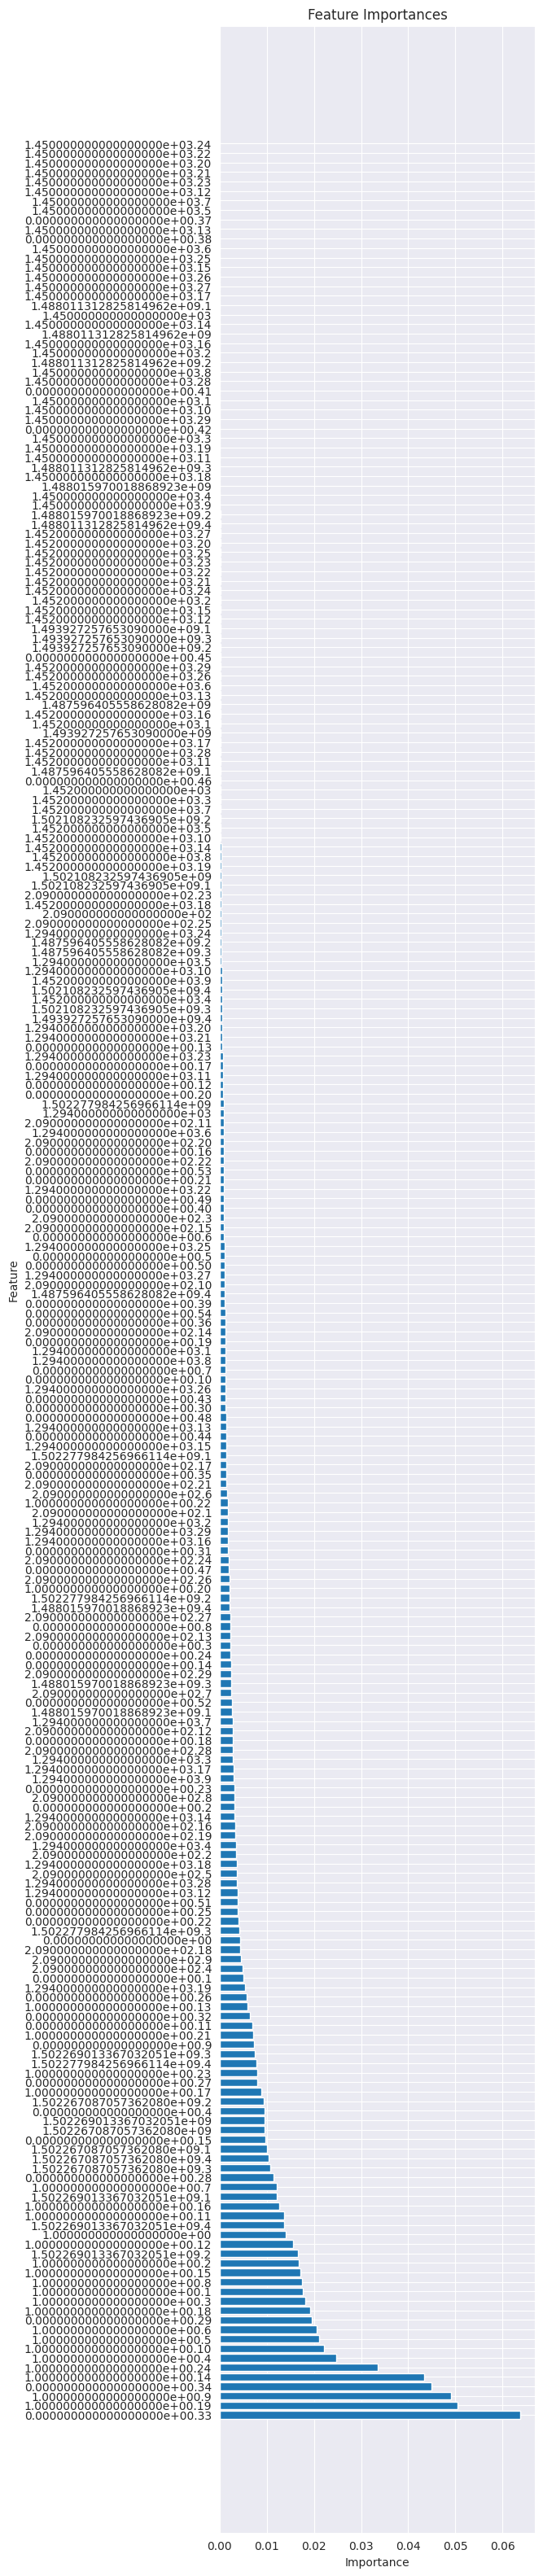

In [23]:


plt.figure(figsize=(5, 40))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
#plt.gca().invert_yaxis()
plt.show()


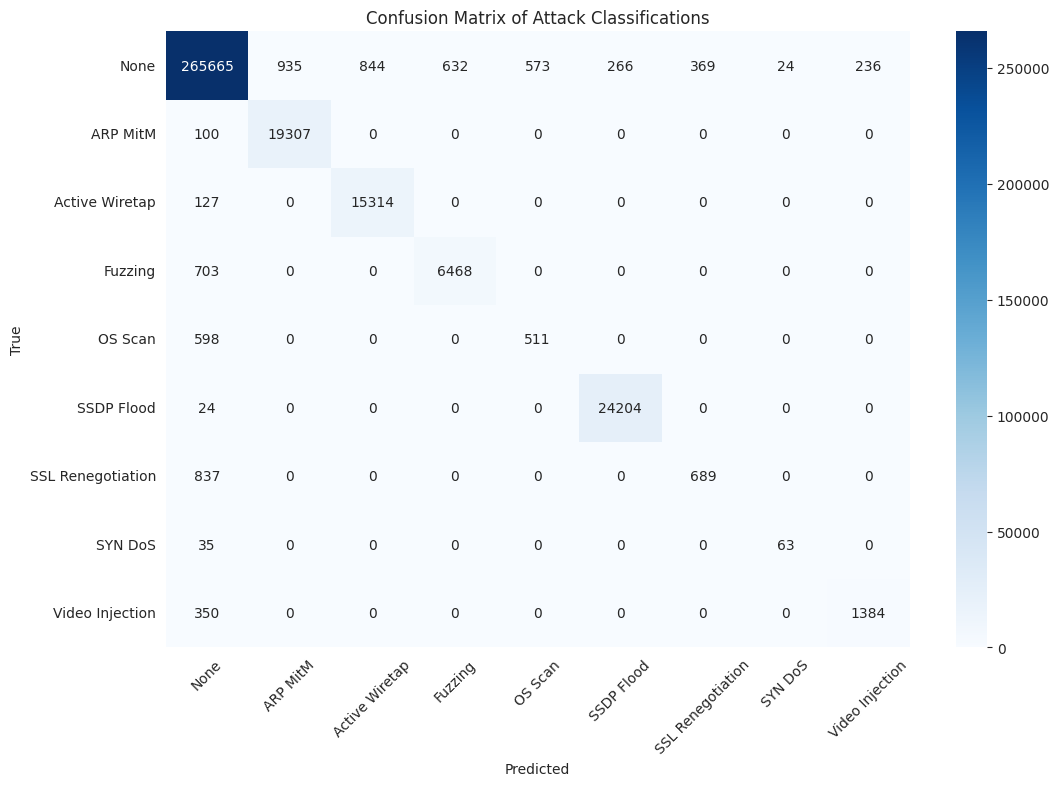

In [29]:
encoded_attacks = {0: 'None', 1: 'ARP MitM', 2: 'Active Wiretap', 3: 'Fuzzing', 4: 'OS Scan',
                   5: 'SSDP Flood', 6: 'SSL Renegotiation', 7: 'SYN DoS', 8: 'Video Injection'}
attack_labels = [encoded_attacks[i] for i in range(len(encoded_attacks))]


plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=attack_labels, yticklabels=attack_labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix of Attack Classifications')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [26]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [27]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [7]:

rf_model = joblib.load('random_forest_model.pkl')

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='labels', data=sample_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

NameError: name 'sample_data' is not defined

<Figure size 800x500 with 0 Axes>

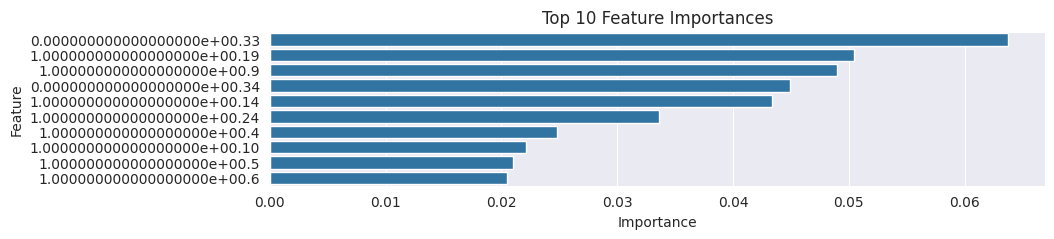

In [14]:
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 2))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='labels', data=label_counts_df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret value `labels` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

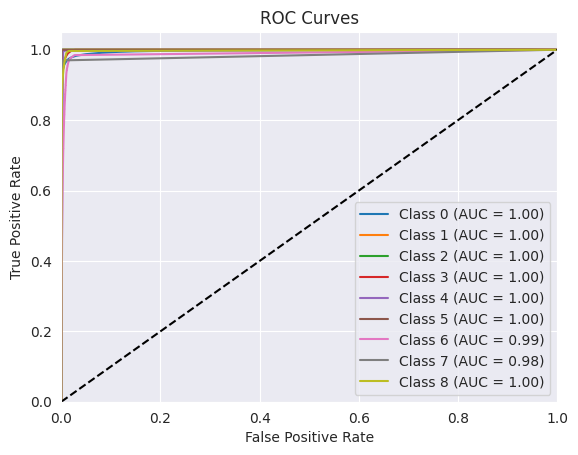

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_score = rf_model.predict_proba(X_test)

# Binarize the true labels for multi-class ROC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8])
n_classes = y_test_bin.shape[1]

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()
